# **Análise de Vendas de Jogos de Vídeo**


---
**Integrantes:**

*    Luiz Gabriel Wojtovicz
*    Leonardo Hitner Furmann
*    Vinícios Guterres
---
**Segmentação de tarefas:**

*    Bibliotecas
*    Extração
*    Transformação
*    Visualização

# **Conexão com Drive**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


# **Bibliotecas**

In [28]:

import os
import zipfile
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

# **Extração**

In [1]:

dataset = "/content/drive/MyDrive/dataset_jogos_extraido-20241017T223142Z-001.zip"

caminho_arquivo_zip = "/content/drive/MyDrive/dataset_jogos.zip"
caminho_extracao = "/content/drive/MyDrive/dataset_jogos_extraido"

with zipfile.ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall(caminho_extracao)

print('Arquivo extraído com sucesso!')

Arquivo extraído com sucesso!


# **Transformação**

In [33]:

'''
Dataframe
'''
data = pd.read_csv("/content/drive/MyDrive/dataset_jogos_extraido/dataset_jogos_extraido/vgsales.csv")
dataframe = pd.DataFrame(data)

'''
Limpeza
'''

dataframe.drop_duplicates(inplace=True)
dataframe.dropna(inplace=True)
dataframe['Year'] = dataframe['Year'].astype(int,
                                             errors='ignore')

#print(dataframe.describe())
display(dataframe)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# **Visualização**

# **Gráfico: barra horizontal | Dimensão: Plataforma | Métrica: Contagem de Vendas**

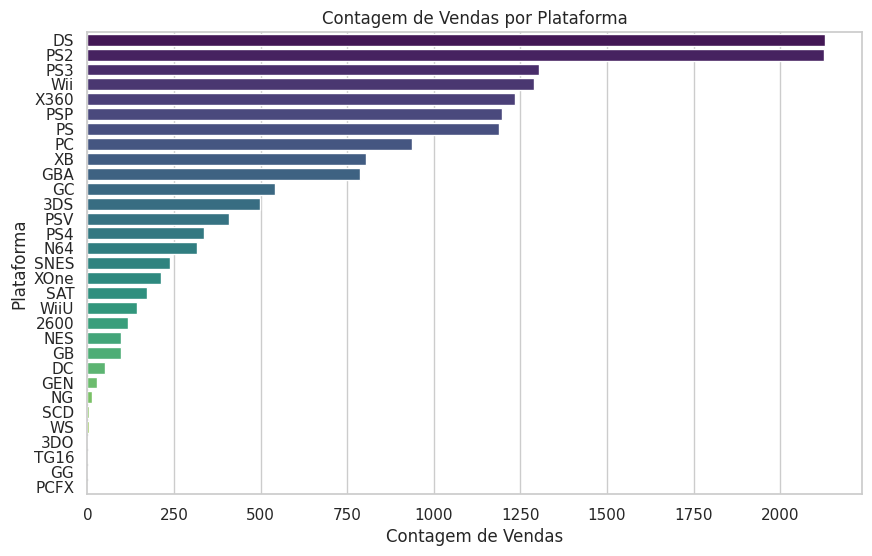

# **Gráfico: barra horizontal | Dimensão: Região | Métrica: Contagem de Vendas**

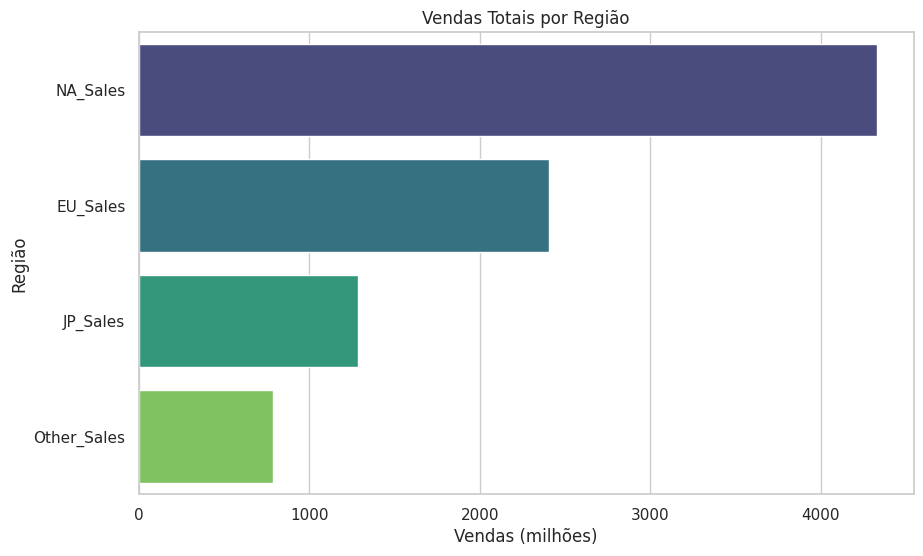

# **Gráfico: linha | Dimensão: Ano | Métrica: Contagem de Vendas**

# **Gráfico: histograma | Dimensão: Plataforma | Métrica: Contagem de Vendas**

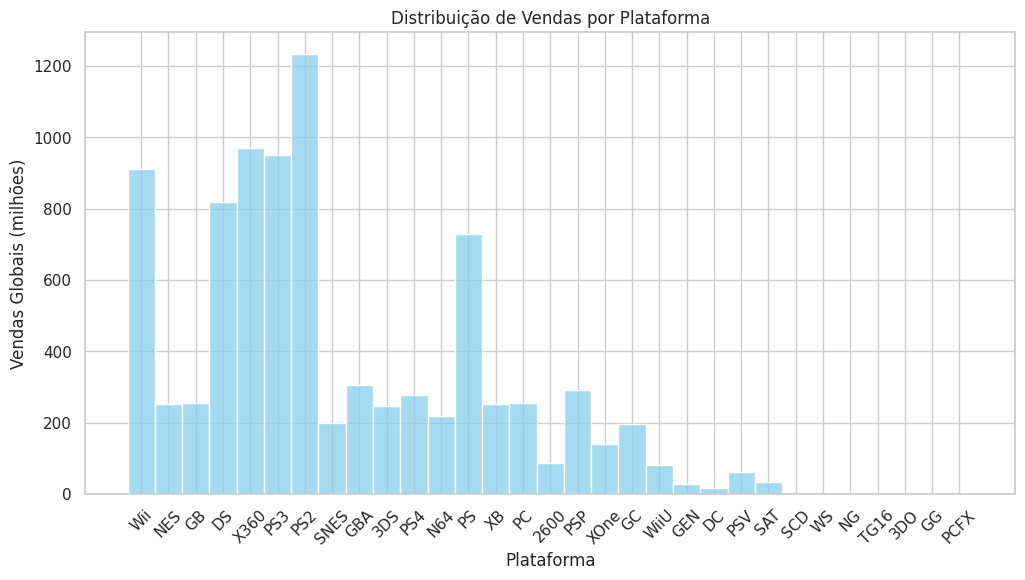

# **Gráfico: histograma | Dimensão: Ano | Métrica: Contagem de Vendas**

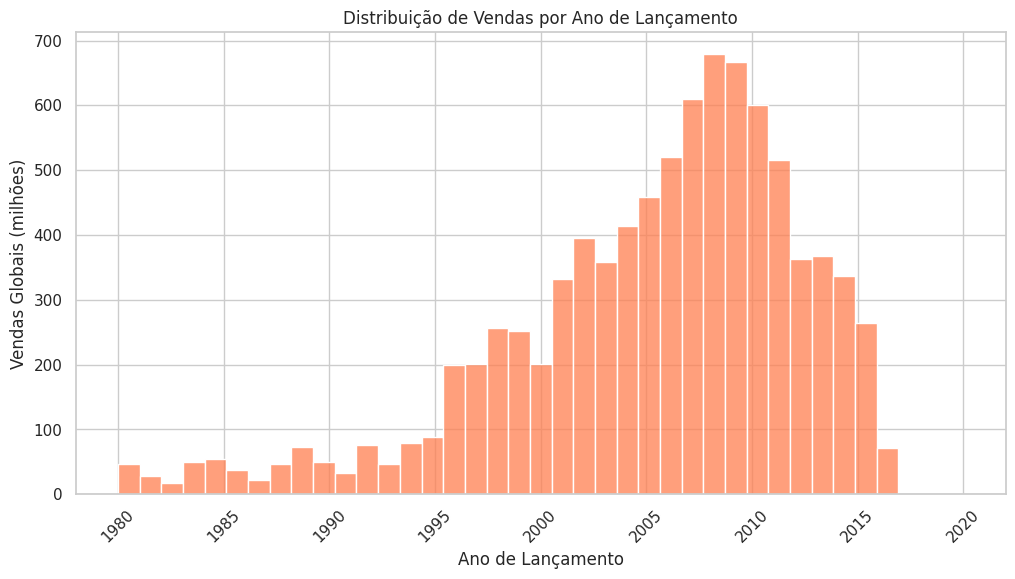

In [36]:

'''
Análise Exploratoria: Usar seaborn e matplotlib para visualizar as vendas de jogos por
plataforma e por região.
'''

# Gráfico: barra horizontal | Dimensão: Plataforma | Métrica: Contagem de Vendas
display(Markdown("# **Gráfico: barra horizontal | Dimensão: Plataforma | Métrica: Contagem de Vendas**"))
plt.figure(figsize=(10, 6))
platform_sales_count = dataframe['Platform'].value_counts().reset_index()
platform_sales_count.columns = ['Platform',
                                'Count']
sns.barplot(data=platform_sales_count,
            x='Count',
            y='Platform',
            palette='viridis')
plt.title('Contagem de Vendas por Plataforma')
plt.xlabel('Contagem de Vendas')
plt.ylabel('Plataforma')
plt.show()

# Gráfico: barra horizontal | Dimensão: Região | Métrica: Contagem de Vendas
display(Markdown("# **Gráfico: barra horizontal | Dimensão: Região | Métrica: Contagem de Vendas**"))
plt.figure(figsize=(10, 6))
region_sales_count = dataframe[['NA_Sales',
                                'EU_Sales',
                                'JP_Sales',
                                'Other_Sales']].sum().reset_index()
region_sales_count.columns = ['Region',
                              'Sales']
sns.barplot(data=region_sales_count,
            x='Sales',
            y='Region',
            palette='viridis')
plt.title('Vendas Totais por Região')
plt.xlabel('Vendas (milhões)')
plt.ylabel('Região')
plt.show()

'''
Criação de Visualizações Interativas: Usar plotly para criar gráficos interativos que
mostrem a evolução das vendas ao longo do tempo
'''

# Gráfico: linha | Dimensão: Ano | Métrica: Contagem de Vendas
display(Markdown("# **Gráfico: linha | Dimensão: Ano | Métrica: Contagem de Vendas**"))
sales_by_year = dataframe.groupby('Year')['Global_Sales'].sum().reset_index()
fig = px.line(sales_by_year,
              x='Year',
              y='Global_Sales',
              title='Evolução das Vendas Globais ao Longo do Tempo',
              labels={'Global_Sales': 'Vendas Globais (milhões)',
                      'Year': 'Ano'},
              markers=True)

fig.show()

'''
Histograma de Vendas: Usar matplotlib ou seaborn para criar histogramas da
distribuição de vendas por plataforma e ano de lançamento.
'''

# Gráfico: histograma | Dimensão: Plataforma | Métrica: Contagem de Vendas
display(Markdown("# **Gráfico: histograma | Dimensão: Plataforma | Métrica: Contagem de Vendas**"))
plt.figure(figsize=(12, 6))
sns.histplot(data=dataframe,
             x='Platform',
             weights='Global_Sales',
             bins=len(dataframe['Platform'].unique()),
             color='skyblue',
             kde=False)
plt.title('Distribuição de Vendas por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (milhões)')
plt.xticks(rotation=45)
plt.show()

# Gráfico: histograma | Dimensão: Ano | Métrica: Contagem de Vendas
display(Markdown("# **Gráfico: histograma | Dimensão: Ano | Métrica: Contagem de Vendas**"))
plt.figure(figsize=(12, 6))
sns.histplot(data=dataframe,
             x='Year',
             weights='Global_Sales',
             bins=len(dataframe['Year'].unique()),
             color='coral',
             kde=False)
plt.title('Distribuição de Vendas por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (milhões)')
plt.xticks(rotation=45)
plt.show()